## Titanic Survival Data Analysis

Here I am going to analyze the survival data for the RMS Titanic shipwreck that occured in 1912. I will be analyzing demograghic characteristics of the population that was aboard the Titanic during its maiden voyage. I will be finding out what factors made a person more likely to survive (in this case, getting onto a lifeboat).

The questions that will be answered from this analysis:
1. Did the person's gender increase the chances of getting on a lifeboat?
2. Did the person's ticket class increase the chances of getting on a lifeboat?
3. Did the person's age play a role in ther survival?

First we see if there are any missing elements in our data.

In [222]:
import unicodecsv
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_passengers = pd.read_csv('titanic_data.csv')
total_passenger_count = len(titanic_passengers)

print(titanic_passengers.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


As we can see from the above description, we have some missing values in our Age category. I will be inserting random values in place of those empty values, replacing them with values that lie in the range of 1 standard deviation (positive and negative) of the mean.

In [223]:
nan_age_count = titanic_passengers['Age'].isnull().sum()
random_age = np.random.randint(titanic_passengers['Age'].mean() - titanic_passengers['Age'].std(), titanic_passengers['Age'].mean() + titanic_passengers['Age'].std(), nan_age_count)
titanic_passengers['Age'][titanic_passengers['Age'].isnull()] = random_age
print(titanic_passengers.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.678081    0.523008   
std     257.353842    0.486592    0.836071   13.512996    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


C:\Users\saura\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Now that I replaced the missing values, I will split my passenger group into two groups using the pandas' groupby function. One group will have all the passengers that survived and the other one will have all passengers that died in the shipwreck.

In [224]:
passengers_split = titanic_passengers.groupby('Survived')
survived_passengers = passengers_split.get_group(1)
dead_passengers = passengers_split.get_group(0)
print(survived_passengers.describe())
print(dead_passengers.describe())

       PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   342.000000     342.0  342.000000  342.000000  342.000000  342.000000   
mean    444.368421       1.0    1.950292   28.586754    0.473684    0.464912   
std     252.358840       0.0    0.863321   14.060193    0.708688    0.771712   
min       2.000000       1.0    1.000000    0.420000    0.000000    0.000000   
25%     250.750000       1.0    1.000000   20.000000    0.000000    0.000000   
50%     439.500000       1.0    2.000000   29.000000    0.000000    0.000000   
75%     651.500000       1.0    3.000000   36.000000    1.000000    1.000000   
max     890.000000       1.0    3.000000   80.000000    4.000000    5.000000   

             Fare  
count  342.000000  
mean    48.395408  
std     66.596998  
min      0.000000  
25%     12.475000  
50%     26.000000  
75%     57.000000  
max    512.329200  
       PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   549.000000 

Now I will try to answer question 1 mentioned above:

Did the person's gender increase the chances of getting on a lifeboat?

To do this I will split my passengers' groups (All passengers, survived passengers and dead passengers) based on their sex. Once I have done that I will find the percentages of male and female passengers that survived/died w.r.t. the total male and female passengers that were onboard.

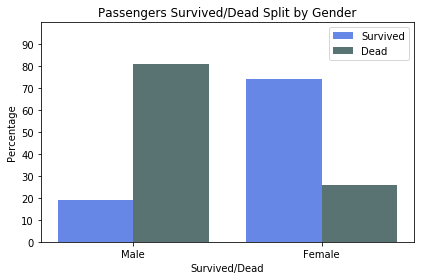

In [225]:
def get_gender_split(data):
    data_split = data.groupby('Sex')
    return (data_split.get_group('male'), data_split.get_group('female'))

%matplotlib inline
titanic_passengers_gender = get_gender_split(titanic_passengers)
titanic_passengers_gender_count = np.array([len(titanic_passengers_gender[0]), len(titanic_passengers_gender[1])])

survived_passengers_gender = get_gender_split(survived_passengers)
survived_passengers_gender_count = np.array([len(survived_passengers_gender[0]), len(survived_passengers_gender[1])])

dead_passengers_gender = get_gender_split(dead_passengers)
dead_passengers_gender_count = np.array([len(dead_passengers_gender[0]), len(dead_passengers_gender[1])])

n_groups = 2
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
rects1 = plt.bar(index, survived_passengers_gender_count * 100 / titanic_passengers_gender_count, bar_width, alpha = opacity, color = 'royalblue', label = 'Survived')
rects2 = plt.bar(index + bar_width, dead_passengers_gender_count * 100 / titanic_passengers_gender_count, bar_width, alpha = opacity, color = 'darkslategrey', label = 'Dead')

plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Survived/Dead')
plt.title('Passengers Survived/Dead Split by Gender')
plt.xticks(index + bar_width / 2, ('Male', 'Female'))
plt.legend()
plt.tight_layout()
plt.show()

Judging from the above bar graph we can see that approximately 80% of the male passengers that were onboard died during the disaster. However we see an almost opposing trend when it comes to female passengers. Approximately 82% of the female passengers onboard survived.

So we can possibly say that women were given higher priority as compared to men when it came to evacuating the ship.

We move to the next question:

Did the person's ticket class increase the chances of getting on a lifeboat?

Similar to the above process, even here we split our groups of passengers based on their 'Ticket Class' (column: 'Pclass') and find the percentage of survived/dead passengers w.r.t. the total passengers in each group.

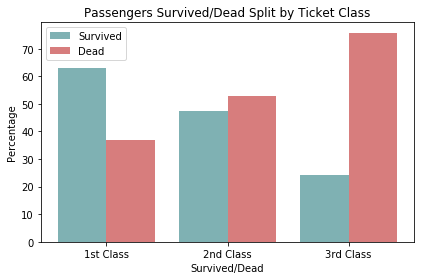

In [226]:
def get_class_split(data):
    data_split = data.groupby('Pclass')
    return (data_split.get_group(1), data_split.get_group(2), data_split.get_group(3))
    
%matplotlib inline
titanic_passengers_class = get_class_split(titanic_passengers)
titanic_passengers_class_count = np.array([len(titanic_passengers_class[0]), len(titanic_passengers_class[1]), len(titanic_passengers_class[2])])

survived_passengers_class = get_class_split(survived_passengers)
survived_passengers_class_count = np.array([len(survived_passengers_class[0]), len(survived_passengers_class[1]), len(survived_passengers_class[2])])

dead_passengers_class = get_class_split(dead_passengers)
dead_passengers_class_count = np.array([len(dead_passengers_class[0]), len(dead_passengers_class[1]), len(dead_passengers_class[2])])

n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
rects1 = plt.bar(index, survived_passengers_class_count * 100 / titanic_passengers_class_count, bar_width, alpha = opacity, color = 'cadetblue', label = 'Survived')
rects2 = plt.bar(index + bar_width, dead_passengers_class_count * 100 / titanic_passengers_class_count, bar_width, alpha = opacity, color = 'indianred', label = 'Dead')

plt.ylabel('Percentage')
plt.xlabel('Survived/Dead')
plt.title('Passengers Survived/Dead Split by Ticket Class')
plt.xticks(index + bar_width / 2, ('1st Class', '2nd Class', '3rd Class'))
plt.legend()
plt.tight_layout()
plt.show()

As per the ticket class, we are given that:
1st = Upper
2nd = Middle
3rd = Lower

From the above graph we can see that as we move from a higher class to a lower class, the survival percentage of passengers decreases. 1st Class had the highest survival rate whereas the 3rd Class had the lowest survival rate. So we can hypothesize that higher the class, higher the chances of survival. 

Moving onto the next question:

Did the person's age play a role in ther survival?

To answer this question we split our groups of passengers into three age groups: children, adults and elderly. Based on these groups we find out the percent survival/death rate of each group.

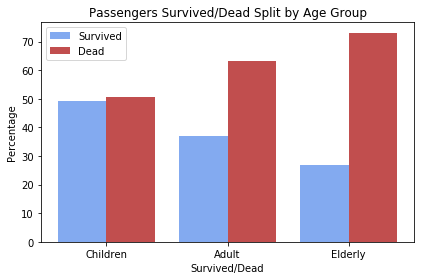

In [227]:
def get_age_group_split(data):
    data_split = data.groupby('Age')
    group_children = pd.DataFrame()
    group_elderly = pd.DataFrame()
    group_adults = pd.DataFrame()
    for i, group in enumerate(data_split.groups):
        if group < 18.0:
            group_split = data_split.get_group(group)
            group_children = group_children.append(group_split)
        elif group >= 60:
            group_split = data_split.get_group(group)
            group_elderly = group_elderly.append(group_split)
        else:
            group_split = data_split.get_group(group)
            group_adults = group_adults.append(group_split)
    
    return (group_children, group_adults, group_elderly)

%matplotlib inline

titanic_passengers_age_group = get_age_group_split(titanic_passengers)
titanic_passengers_age_group_count = np.array([len(titanic_passengers_age_group[0]), len(titanic_passengers_age_group[1]), len(titanic_passengers_age_group[2])])

survived_passengers_age_group = get_age_group_split(survived_passengers)
survived_passengers_age_group_count = np.array([len(survived_passengers_age_group[0]), len(survived_passengers_age_group[1]), len(survived_passengers_age_group[2])])

dead_passengers_age_group = get_age_group_split(dead_passengers)
dead_passengers_age_group_count = np.array([len(dead_passengers_age_group[0]), len(dead_passengers_age_group[1]), len(dead_passengers_age_group[2])])

n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
rects1 = plt.bar(index, survived_passengers_age_group_count * 100 / titanic_passengers_age_group_count, bar_width, alpha = opacity, color = 'cornflowerblue', label = 'Survived')
rects2 = plt.bar(index + bar_width, dead_passengers_age_group_count * 100 / titanic_passengers_age_group_count, bar_width, alpha = opacity, color = 'firebrick', label = 'Dead')

plt.ylabel('Percentage')
plt.xlabel('Survived/Dead')
plt.title('Passengers Survived/Dead Split by Age Group')
plt.xticks(index + bar_width / 2, ('Children', 'Adult', 'Elderly'))
plt.legend()
plt.tight_layout()
plt.show()

Judging from the above bar graph, we do not see a fixed pattern in the survival rates of each group. The highest survival rate was that of children at around 50%. As we move to higher age groups we can see that the survival percentage decreased. The only hypothesis that we can draw from this is that possibly children were given more priority as compared to other age group. However, it is not clear how the ship crew could have efficiently grouped people into age groups during the calamity.

### To conclude we can hypothesize the following things:
1. The chances of women surviving the shipwreck are higher as compared to men.
2. People with a first class ticket had highest chances of survival as compared to other classes. Chances of survival of someone with a second class ticket are higher as compared to someone with a third class ticket, however the chances are less as compared to someone with a first class ticket.
3. Age probably might not have a very big role to play in chances of survival except for children. Wherein children were given priority over other age groups.

### References:
1. https://docs.scipy.org/doc/
2. http://pandas.pydata.org/
3. https://matplotlib.org/examples/color/named_colors.html
4. https://www.kaggle.io/svf/924638/c05c7b2409e224c760cdfb527a8dcfc4/__results__.html#load-and-check-data